# Symbolic Computing

## Some introductory notions in SymPy

The function init_printing() will enable LaTeX pretty printing in the notebook for SymPy expressions. It is recommended you call it at the top of any notebook that uses SymPy.

We can import sympy as follows,


In [66]:
import sympy as sym
sym.init_printing()

SymPy symbols are then created with the symbols() function. SymPy expressions are, in turn, built up from symbols, numbers, and SymPy functions. This is somewhat in contrast to Mathematica, where numbers and variables will be treated using an exact or symbolic representation.

In [68]:
?x

In [67]:
x, y, z = sym.symbols('x y z')
alpha1, omega_2 = sym.symbols('alpha1 omega_2')
(alpha1, omega_2)

In [9]:
sym.sin(x + 1) - sym.cos(y)

In sympy, we may have to initialize a symbolic representation of numeric values as well.

In [69]:
sym.S(2)

In [70]:
sym.S(1)/2

In [14]:
sym.Rational(1, 2)

In both Mathematica and SymPy, we will need to request approximate decimal representations of exact quantities if the need arises.

In [25]:
a = x+2
a = a.subs(x, sym.pi)
a.evalf(100)

### Quick exercise:

Write a symbolic expression for

$$
\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$
 
The function for exponentiation is `sym.exp`, and square root is is `sym.sqrt`. You will need to create symbols for sigma and mu. See if you can evaluate this expression numerically for $\mu=0$, $x=1$, and $\sigma = 2$.

You should also type a similar expression into Mathematica and/or Wolfram Alpha, and see what happens there. Again, see if you can evaluate this expression numerically. Can you produce both a simplified analytic expression and an answer in a numerical (decimal) form?

In [72]:
s, m = sym.symbols('s, m')
gaussian = 1/sym.sqrt(2*sym.pi*s**2) * sym.exp(-(x-m)**2/(2*s**2))
gaussian.subs([(x, 1), (s, 2), (m, 0)]).evalf(10)

## Plotting in SymPy

We can also create a basic plot in sympy. In the background, sympy will pass expressions to matplotlib, although different plotting backends can be specified.

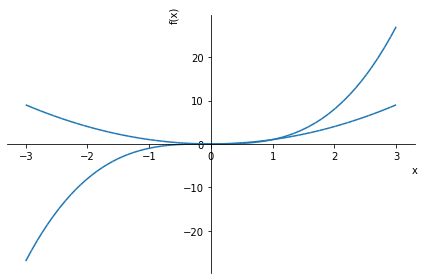

In [30]:
from sympy.plotting import plot
plot(x**2, x**3, (x, -3, 3))

### Quick exercise:

Can you produce a quick plot of the Gaussian function above, for $\mu = 0$ and $\sigma = 2$? Can you do so in Mathematica (or on WolframAlpha) as well?

## Calculus

We can also differentiate and integrate expressions. Differentiation is accomplished with `sym.diff`, and integration with `sym.integrate`, which supports both definite and indefinite integrals.

In [31]:
sym.diff(x**2, x)

In [32]:
sym.integrate(x**2, x)

In [34]:
sym.integrate(x**2, (x,-3,3))

But, it doesn't take too much to trip up SymPy.

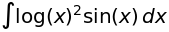

In [47]:
sym.integrate(sym.log(x)**2 * sym.sin(x) )

### Quick Exercise:

Again using the Gaussian function, can you compute its derivative and indefinite integral? What about in Mathematica/WolframAlpha?

Can you evaluate a definite integral for the choices of $\mu=0$, $x=1$, $\sigma=2$, obtaining both analytic and numerical expressions?

How about the $\log^2 \sin$ integral above; can Mathematica/WolframAlpha integrate this?

## Systems of equations

### Algebraic equations

We can also solve systems of algebraic and differential equations. Solutions to algebraic equations are fairly straightforward; we supply an expression equal to zero, and `solve` takes care of it when possible.

In [50]:
eq1 = x**2 + y**2 - z  # circle of radius z
eq2 = 2*x + y - 1  # straight line: y(x) = -2*x + 1
sym.solve([eq1, eq2], [x, y])

### Differential Equations

For differential equations, we will need to define symbolic functions. This can be accomplished using `sym.Function`. Below is an example of using this to solve the harmonic oscillator equtaion. Two main functions exist (alongside many others useful for other purposes), `dsolve` and `pdsolve`.  Note that, in the solution obtained, the variable $c$ can be complex.

In [62]:
f = sym.Function('f')
c = sym.symbols('c')
sym.dsolve(f(x).diff(x, 2) - c**2*f(x))

Abstract functions can accept multiple arguments, which also allows us to solve certain types of PDEs where an analytic solution exists. Below is an example of this for the one-dimensional advection equation,

$$
\partial_x f(x,t) - \partial_t f(x, t) = 0
$$


In [73]:
t = sym.symbols('t')
sym.pdsolve(f(x,t).diff(x) + f(x,t).diff(t))

### Quick Exercise

Below, see if you can obtain a solution to the wave equtaion.

$$
\partial_x^2 f(x,t) - \partial_t^2 f(x, t) = 0
$$

Can you obtain one in Mathematica/WolframAlpha?
